In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
import re
from unidecode import unidecode
from mpl_toolkits import mplot3d
from yellowbrick.cluster import KElbowVisualizer

nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
caminho_arquivo_1= 'text.txt'
stemmer = nltk.stem.RSLPStemmer()
df= pd.read_csv(caminho_arquivo_1,sep="," )
df["dsc_item"] = df["dsc_item"].apply(lambda x: x.lower())
df["dsc_item"] = df["dsc_item"].apply(lambda x: re.sub('|,|\.|/|$|\(|\)|-|\+|:|•', '', x))
df["dsc_item"] = df["dsc_item"].apply(lambda x: stemmer.stem(x))
df.head()

,dsc_item,n
0,agua sanit,7
1,biscoito agua e s,4
2,agua mineral c20lt,3
3,sabao em po cor azul composto por tensoativo ...,3
4,agua destilada 10ml,2


In [32]:
# tirando a questao de stopwords
vec = TfidfVectorizer()
vec.fit(df.dsc_item.values)
features = vec.transform(df.dsc_item.values)

In [48]:
wcss = []
for cluster in range(2,7):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)
    cls.fit(features)
    silhouette_avg = v_measure_score(df.dsc_item.values, cls.labels_)
    print("For n_clusters =", cluster,"The average silhouette_score is :", silhouette_avg)
    wcss.append(cls.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.18133062701013578


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.23928613422421358


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3230093043747004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3669627456758701


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3645687927510722


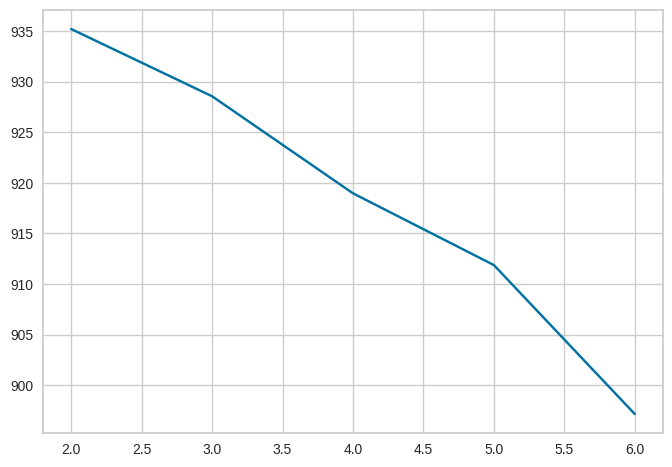

In [49]:
clusters = [i for i in range(2,7)]
plt.plot(clusters, wcss)


FileNotFoundError: ignored

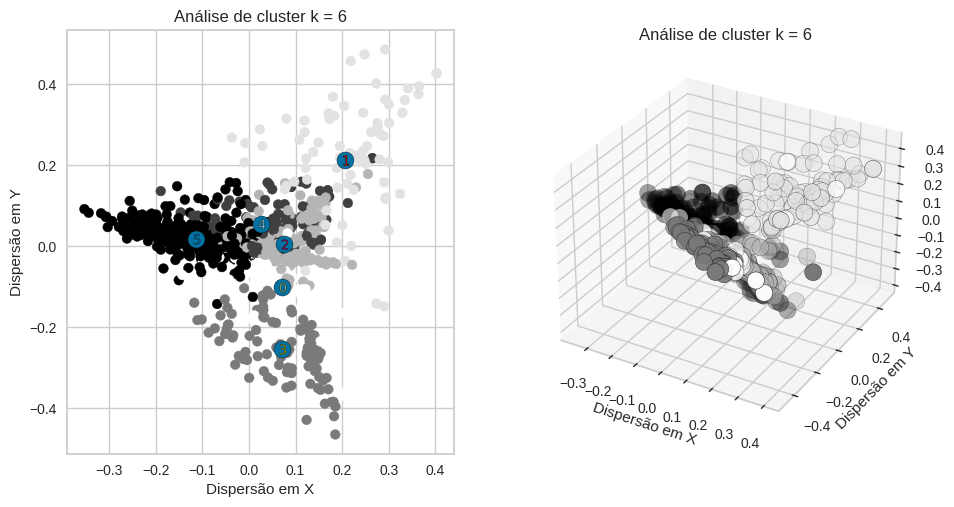

In [50]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
#Visualização gráfica 2D
# Converte as features para 2D
pca = PCA(n_components=2, random_state= 0)
reduced_features = pca.fit_transform(features.toarray())

# Converte os centros dos clusters para 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
#Plota gráfico 2D
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')
#Plota números nos clusters
for i, c in enumerate(reduced_cluster_centers):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

#Adiciona informações no gráfico
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#Visualização gráfica 3D
ax = fig.add_subplot(1, 2, 2,projection="3d")

# ax = plt.axes(projection="3d")
# Adiciona informações no gráfico
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#converte dados para 3D
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

#Plota dados em 3D
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=cls.predict(features))
# Converte os centros dos clusters para 3D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

#Salva arquivo de imagem 3D
plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


FileNotFoundError: ignored

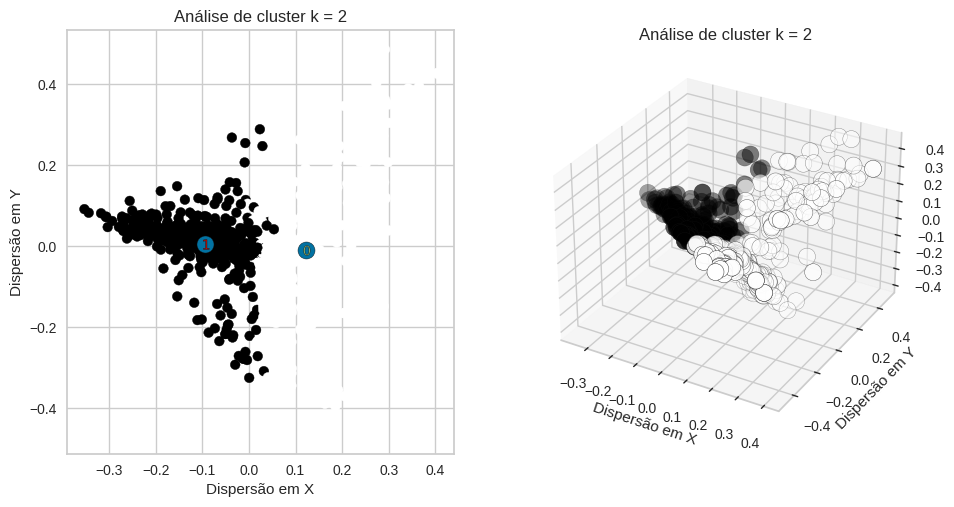

In [51]:
for cluster in range(2, 7):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)  # Você pode alterar o valor de random_state

    cls.fit(features)

    # Visualização 2D
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)

    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features))
    ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='o', s=150, edgecolor='k')

    for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Visualização 3D
    ax = fig.add_subplot(1, 2, 2, projection="3d")

    pca = PCA(n_components=3, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter3D(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], marker='o', s=150, edgecolor='k', c=cls.predict(features))

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Salva o arquivo de imagem 3D
    plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
    plt.show()